In [27]:
from jira import JIRA
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from numpy import nan
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




In [28]:
jira_url = 'https://kainos-evolve.atlassian.net'
jira = JIRA(jira_url)

# Items for the EMR Cloud team (R1)

In [29]:
#jql = 'project = ECL and type not in subTaskIssueTypes() and type != epic and fixVersion = R1 and labels = Required_for_production_data and statusCategory != Done and labels != sec_arch'
#jql = 'project = ECL and type not in subTaskIssueTypes() and type != epic and fixVersion = R1  and statusCategory != Done and (labels != sec_arch or labels is empty)'
jql = 'project = ECL AND type not in subTaskIssueTypes() AND type != epic AND fixVersion = R1 AND statusCategory != Done AND (labels = Required_for_production_data and labels != sec_arch)'
issuesRaw = jira.search_issues(jql)

issues = pd.DataFrame()
issues['key'] = ''
issues['type'] = ''
issues['status'] = ''
issues['SP'] = 0
issues['summary'] = ''

#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)

    assignee = None
    if issue.fields.assignee : assignee = issue.fields.assignee.displayName
        
    issues = issues.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'descriptionLen': descriptionLen,
         'assignee': assignee
        }, ignore_index=True)

#only use remainingEffort if it's defined
def setRemainingSP(remainingEffort, SP):
    if(not pd.isnull(remainingEffort)): return remainingEffort
    else: return SP

issues['RemainingSP'] = issues.apply(lambda x: setRemainingSP(x['remainingEffort'], x['SP']), axis=1)

#print(issues.RemainingSP.sum())
issues
#issues.to_clipboard()


,key,type,status,SP,summary,assignee,descriptionLen,remainingEffort,RemainingSP
0,ECL-151,Story,Backlog,5.0,Overlay R1 changes to Brompton environments,None,210.0,None,5.0
1,ECL-104,Story,Backlog,5.0,Custom Log Ingestion,Brett Bieker,124.0,None,5.0
2,ECL-102,Story,Backlog,3.0,Test Azure File Storage Failover,None,376.0,None,3.0
3,ECL-101,Story,Backlog,5.0,Test SQL database recovery scenarios,None,278.0,None,5.0
4,ECL-100,Story,Backlog,5.0,Test VM based DR strategies using Azure Site R...,Nick Friday,195.0,None,5.0
5,ECL-99,Story,In Progress,5.0,Apply CIS Benchmarks: Microsoft Azure,Thomas Thornton,499.0,None,5.0
6,ECL-97,Story,Backlog,5.0,Prepare environment / access / support pen-test,None,0.0,None,5.0
7,ECL-95,Story,In Progress,5.0,Define scope for pen-test,None,447.0,1,1.0
8,ECL-94,Story,Backlog,5.0,Copy Brompton 'Production' data to Azure subsc...,None,1396.0,None,5.0
9,ECL-91,Story,Backlog,5.0,Define NSGs on all nodes (management),Brett Bieker,730.0,None,5.0


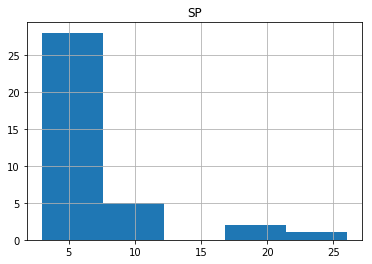

In [30]:
issues.hist(column='SP', bins=5);

# Security architect issues for R1

In [31]:
jql = 'project = ECL and type not in subTaskIssueTypes() and type != epic and fixVersion = R1 and labels = Required_for_production_data and statusCategory != Done and labels = sec_arch'
issuesRaw = jira.search_issues(jql)

secIssues = pd.DataFrame()
secIssues['key'] = ''
secIssues['type'] = ''
secIssues['status'] = ''
secIssues['SP'] = 0
secIssues['summary'] = ''

#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)
    secIssues = secIssues.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'descriptionLen': descriptionLen
        }, ignore_index=True)
secIssues

,key,type,status,SP,summary


In [32]:
#find all subtasks for given tasks and check if SP sum of subtasks equals SP in task
jql = 'project = ECL and type in subTaskIssueTypes() '

subtasks = pd.DataFrame()
subtasks['key'] = ''
subtasks['status'] = ''
subtasks['SP'] = 0
subtasks['parent'] = ''
subtasks['summary'] = ''

issuesRaw = jira.search_issues(jql, maxResults=False)
for issue in issuesRaw:
            subtasks = subtasks.append(
                {
                 'key': issue.key,
                 'status': issue.fields.status.name,
                 'SP': issue.fields.customfield_10005,
                 'parent': issue.fields.parent.key,
                 'summary': issue.fields.summary,
                }, ignore_index=True)

#subtasks

# Parent VS Subtasks

In [33]:
#compare sum of SP in subtasks and in parent issue
subtasksAggr = subtasks.groupby(['parent']).agg({'SP':['sum'], 'parent': 'count'}, as_index=False)
subtasksAggr.columns = subtasksAggr.columns.droplevel(0)
subtasksAggr = subtasksAggr.reset_index()

print('Subtasks')
subtasksAggr


merged_issues = issues.merge(subtasksAggr, left_on='key', right_on='parent', how='left')
#show only stories larger than 5SP
merged_issues = merged_issues[(merged_issues['SP'] > 5)]
merged_issues = merged_issues.sort_values('SP', ascending=False)

print('Parent vs subtasks')
merged_issues

Subtasks


,parent,sum,count
0,ECL-12,6.0,2
1,ECL-24,26.0,4
2,ECL-25,22.0,3
3,ECL-59,2.0,1
4,ECL-68,0.0,3
5,ECL-87,1.0,2


Parent vs subtasks


,key,type,status,SP,summary,assignee,descriptionLen,remainingEffort,RemainingSP,parent,sum,count
28,ECL-24,Story,In Progress,26.0,Barracuda - restrict access into and out of th...,James Thompson,721.0,2,2.0,ECL-24,26.0,4.0
18,ECL-54,Story,Backlog,20.0,Document all system data flows in preparation ...,None,0.0,5,5.0,NaN,NaN,NaN
19,ECL-53,Story,In Progress,20.0,Complete all aspects of the system design,Martin O'Neill,0.0,12,12.0,NaN,NaN,NaN
10,ECL-87,Story,In Progress,10.0,Provide a sFTP server to accept scanned images...,Pawel Mazurkiewicz,1127.0,5,5.0,ECL-87,1.0,2.0
13,ECL-69,Story,In Progress,10.0,Alert Logic - Define system security dashboard...,Nick Friday,170.0,5,5.0,NaN,NaN,NaN
14,ECL-65,Story,In Progress,10.0,Define an approach to backup management and re...,Thomas Thornton,506.0,5,5.0,NaN,NaN,NaN
17,ECL-55,Story,Backlog,10.0,Document all untreated or residual risks for T...,daveym,0.0,2,2.0,NaN,NaN,NaN
27,ECL-25,Story,Backlog,10.0,Apply NSGs between the various tiers in Evolve...,None,469.0,None,10.0,ECL-25,22.0,3.0


# Items with no descriptions

In [34]:
noDescriptions = issues[(issues['descriptionLen'] < 10)]
noDescriptions
#noDescriptions.to_clipboard()

,key,type,status,SP,summary,assignee,descriptionLen,remainingEffort,RemainingSP
6,ECL-97,Story,Backlog,5.0,Prepare environment / access / support pen-test,None,0.0,None,5.0
17,ECL-55,Story,Backlog,10.0,Document all untreated or residual risks for T...,daveym,0.0,2,2.0
18,ECL-54,Story,Backlog,20.0,Document all system data flows in preparation ...,None,0.0,5,5.0
19,ECL-53,Story,In Progress,20.0,Complete all aspects of the system design,Martin O'Neill,0.0,12,12.0
20,ECL-50,Story,Backlog,3.0,Define a SysOps document for Kainos personnel....,daveym,0.0,1,1.0
21,ECL-43,Story,Backlog,5.0,Define an operational responsibilities documen...,None,0.0,None,5.0
22,ECL-42,Story,Backlog,5.0,Define a playbook of operational incidents - w...,Thomas Thornton,0.0,1,1.0


# Issues not moved in last 1W

In [35]:
jql = 'project = ECL and status="In Progress" AND not status changed after -2w'

issuesRaw = jira.search_issues(jql)

notMovingIssues = pd.DataFrame()

#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)
    notMovingIssues = notMovingIssues.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'updated': issue.fields.updated,
         'assignee': issue.fields.assignee,
         'version': issue.fields.fixVersions
         
            
        }, ignore_index=True)

print('Issues not moved in last 1W')
notMovingIssues

Issues not moved in last 1W


,SP,assignee,key,remainingEffort,status,summary,type,updated,version
0,10.0,Pawel Mazurkiewicz,ECL-87,5.0,In Progress,Provide a sFTP server to accept scanned images...,Story,2018-04-10T10:42:36.437+0100,[R1]
1,10.0,Nick Friday,ECL-69,5.0,In Progress,Alert Logic - Define system security dashboard...,Story,2018-04-09T09:43:39.618+0100,[R1]
2,10.0,Brett Bieker,ECL-44,NaN,In Progress,Find a solution for improving load balancer he...,Story,2018-04-09T09:43:39.997+0100,[1.5]
3,10.0,Andy Thompson,ECL-28,6.0,In Progress,Define system performance dashboards that show...,Story,2018-04-09T09:43:39.545+0100,[R1]


# Assigned issues

In [36]:
jql = 'project = ECL and assignee is not empty and statusCategory != Done and status not in (Backlog)'
issuesRaw = jira.search_issues(jql, maxResults=False)

assignedIssues = pd.DataFrame()


#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)

    assignee = None
    if issue.fields.assignee : assignee = issue.fields.assignee.displayName
    
    sprints = []    
    
    for rawSprint in issue.fields.customfield_10007:
        #unfortunately sprint information is encoded and regex is needed
        matches = re.search('name=(.*?),', rawSprint)
        sprints.append(matches.group(1))
    
    if issue.fields.fixVersions : version = str(issue.fields.fixVersions)
    else: version = ''
        
    assignedIssues = assignedIssues.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'descriptionLen': descriptionLen,
         'assignee': assignee,
         'version': version,
         'labels': issue.fields.labels,
         'sprints': ', '.join(sprints)
        }, ignore_index=True)

assignedIssues = assignedIssues.sort_values('assignee', ascending=False)
#assignedIssues
    
t = [('person', ['Nick Friday','Thomas Thornton', 'Andy Thompson', "Martin O'Neill", 'Marty Taggart', 'James Thompson', 
        'Brett Bieker', 'Pawel Mazurkiewicz', 'Anna Rogalska', 'Rafal Dziegielewski', 'Bartek Czaczkowski'])]
team = pd.DataFrame.from_items(t)

teamIssues = team.merge(assignedIssues, left_on='person', right_on='assignee', how='left')

def color_status(val):
    color = 'blue' if val in ['In Testing', 'In Review'] else 'black'
    return 'color: %s' % color

teamIssues = teamIssues.style.applymap(color_status)
teamIssues
#teamIssues.to_clipboard()

,person,SP,assignee,descriptionLen,key,labels,remainingEffort,sprints,status,summary,type,version
0,Nick Friday,10,Nick Friday,170,ECL-69,['Required_for_production_data'],5,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018, EMC Sprint 2 12032018",In Progress,Alert Logic - Define system security dashboards and integration points,Story,[]
1,Thomas Thornton,5,Thomas Thornton,499,ECL-99,['Required_for_production_data'],None,EMC Sprint 6 09-04-2018,In Progress,Apply CIS Benchmarks: Microsoft Azure,Story,[]
2,Thomas Thornton,3,Thomas Thornton,599,ECL-18,"['Cloud_Platform', 'Required_for_production_data']",2,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Review,Restrict share and NTFS permissions on Meridio SOAP shares,Story,[]
3,Thomas Thornton,10,Thomas Thornton,506,ECL-65,['Required_for_production_data'],5,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Progress,Define an approach to backup management and restore processes,Story,[]
4,Andy Thompson,10,Andy Thompson,278,ECL-28,[],6,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Progress,Define system performance dashboards that show the health of the application stack,Story,[]
5,Andy Thompson,5,Andy Thompson,244,ECL-60,"['Cloud_Platform', 'Required_for_production_data']",2,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Progress,Implement RBAC on the Azure Portal,Story,[]
6,Martin O'Neill,20,Martin O'Neill,0,ECL-53,"['Cloud_Platform', 'Required_for_production_data']",12,EMC Sprint 8 23-04-2018,In Progress,Complete all aspects of the system design,Story,[]
7,Martin O'Neill,1,Martin O'Neill,150,ECL-84,[],None,"EMC Sprint 1 05032018, EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Progress,Document and present options,Sub-task,
8,Martin O'Neill,5,Martin O'Neill,42,ECL-12,"['Cloud_Platform', 'Required_for_production_data']",1,"EMC Sprint 1 05032018, EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Review,Encrypt - Encrypt all Databses,Story,[]
9,Marty Taggart,5,Marty Taggart,425,ECL-27,['Required_for_production_data'],2,"EMC Sprint 3 19-03-2018, EMC Sprint 6 09-04-2018",In Progress,Ensure that virus scanning is present,Story,[]


# Not estimated items

In [37]:
#issues
notEstimated = issues[issues['SP'].isnull()]
notEstimated

,key,type,status,SP,summary,assignee,descriptionLen,remainingEffort,RemainingSP


# Items not assigned to tranches

In [38]:
jql = 'project = ECL AND fixVersion is EMPTY AND type not in (epic, subTaskIssueTypes())'
issuesRaw = jira.search_issues(jql)

issuesNoFixVersion = pd.DataFrame()


#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)

    assignee = None
    if issue.fields.assignee : assignee = issue.fields.assignee.displayName
        
    issuesNoFixVersion = issuesNoFixVersion.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'descriptionLen': descriptionLen,
         'assignee': assignee
        }, ignore_index=True)

#issuesNoFixVersion

# Current sprint issues

In [39]:
sprintName = "EMC Sprint 6 09-04-2018"
jql = 'sprint = "{}" and type not in (epic, subTaskIssueTypes()) and status not in (Done)'.format(sprintName)

issuesRaw = jira.search_issues(jql)

sprintIssues = pd.DataFrame()


#add issues to dataframe
for issue in issuesRaw:
    descriptionLen = 0
    if issue.fields.description : descriptionLen = len(issue.fields.description)

    assignee = None
    if issue.fields.assignee : assignee = issue.fields.assignee.displayName
        
    sprintIssues = sprintIssues.append(
        {
         'key': issue.key,
         'type': issue.fields.issuetype.name,
         'status': issue.fields.status.name,
         'SP': issue.fields.customfield_10005,
         'remainingEffort': issue.fields.customfield_14500,
         'summary': issue.fields.summary,
         'assignee': assignee
        }, ignore_index=True)
    
sprintIssues['RemainingSP'] = sprintIssues.apply(lambda x: setRemainingSP(x['remainingEffort'], x['SP']), axis=1)


print('SP sum in sprint ({}): {}'.format(sprintName, sprintIssues.RemainingSP.sum()))
sprintIssues


SP sum in sprint (EMC Sprint 6 09-04-2018): 82.0


,SP,assignee,key,remainingEffort,status,summary,type,RemainingSP
0,21.0,Anna Rogalska,ECL-109,NaN,In Progress,Automating UI tests - Setting up configuration...,Story,21.0
1,5.0,Nick Friday,ECL-100,NaN,Backlog,Test VM based DR strategies using Azure Site R...,Story,5.0
2,5.0,Thomas Thornton,ECL-99,NaN,In Progress,Apply CIS Benchmarks: Microsoft Azure,Story,5.0
3,10.0,Pawel Mazurkiewicz,ECL-87,5.0,In Progress,Provide a sFTP server to accept scanned images...,Story,5.0
4,3.0,James Thompson,ECL-74,1.0,In Progress,Barracuda - configure AV module,Story,1.0
5,10.0,Nick Friday,ECL-69,5.0,In Progress,Alert Logic - Define system security dashboard...,Story,5.0
6,10.0,Thomas Thornton,ECL-65,5.0,In Progress,Define an approach to backup management and re...,Story,5.0
7,5.0,Andy Thompson,ECL-60,2.0,In Progress,Implement RBAC on the Azure Portal,Story,2.0
8,10.0,Brett Bieker,ECL-44,NaN,In Progress,Find a solution for improving load balancer he...,Story,10.0
9,10.0,Andy Thompson,ECL-28,6.0,In Progress,Define system performance dashboards that show...,Story,6.0


# Velocity calculations

In [40]:
jql = 'project = ECL and status changed to "Done" after "2018-03-01" and status = Done'
issuesRaw = jira.search_issues(jql, maxResults=False)
completedIssues = pd.DataFrame()

for issue in issuesRaw:
            completedIssues = completedIssues.append(
                {
                 'key': issue.key,
                 'status': issue.fields.status.name,
                 'SP': issue.fields.customfield_10005,
                 'summary': issue.fields.summary,
                }, ignore_index=True)

def weekDiff(start, end):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, 'W'))

weeksFromStart = weekDiff('2018-03-01', pd.to_datetime('today'))

print('Weeks from 2018-03-01: {0}'.format(weeksFromStart))
print('Completed SP from 2018-03-01: {0}'.format(completedIssues.SP.sum()))
print('Weekly velocity:{}'.format(completedIssues.SP.sum() / weeksFromStart))        

completedIssues

Weeks from 2018-03-01: 5
Completed SP from 2018-03-01: 85.0
Weekly velocity:17.0


,SP,key,status,summary
0,2.0,ECL-96,Done,Engage pen-test partner e.g. NCC
1,5.0,ECL-93,Done,Creation of a seperate PoC environment
2,3.0,ECL-92,Done,Review CIS Azure Benchmark
3,3.0,ECL-86,Done,Develop a process to script the startup of POC...
4,5.0,ECL-83,Done,Investigate approach to database encryption
5,10.0,ECL-76,Done,Testing of firewall changes
6,1.0,ECL-75,Done,Review Barracuda config
7,10.0,ECL-72,Done,Internal firewall restriction (part 1)
8,5.0,ECL-71,Done,Edge firewall restriction (part 1)
9,5.0,ECL-61,Done,Enable Auditing on Azure Portal to track all c...


# Time to finish estimations

In [41]:
#estimated velocity from 3 planned sprints
estVelocity1st = (77+35+32)/3
estVelocity = 20
SPSum = issues.RemainingSP.sum()
#subtract Sec. Arch. issues - 38 SP
#SPSum = SPSum - 38

weeksToFinishEstVel = math.ceil(SPSum / estVelocity)

avgVelocity = math.ceil(65/4)
weeksToFinishAvgVel = math.ceil(SPSum / avgVelocity)

weeksToFinish = 8
expectedVelocity = math.ceil(SPSum / weeksToFinish)
sumSPToFinish = 8 * estVelocity


print('Estimated velocity per sprint 1st try based on sprints (iteration, week): {}'.format(estVelocity1st))
print('Estimated future velocity per sprint: {}'.format(estVelocity))
print('Average sprint velocity per sprint (based on Jira completed stories): {0}'.format(avgVelocity))
print('Expected velocity to finish in {} weeks (June 1st): {}'.format(weeksToFinish, expectedVelocity))
print('SP sum for {} weeks and estimated velocity ({}): {}'.format(weeksToFinish, estVelocity, sumSPToFinish))
print('Sum of SP to do: {}'.format(SPSum))
print('Difference between planned SP and deliverable SP ({} [SP per week] * {} [weeks]):{}'.format(estVelocity, weeksToFinish, SPSum - sumSPToFinish))
print('Sprints (iterations, weeks) to finish (according to est. velocity): {}'.format(weeksToFinishEstVel))
print('Sprints (iterations, weeks) to finish (according to avg velocity): {}'.format(weeksToFinishAvgVel))



Estimated velocity per sprint 1st try based on sprints (iteration, week): 48.0
Estimated future velocity per sprint: 20
Average sprint velocity per sprint (based on Jira completed stories): 17
Expected velocity to finish in 8 weeks (June 1st): 19
SP sum for 8 weeks and estimated velocity (20): 160
Sum of SP to do: 151.0
Difference between planned SP and deliverable SP (20 [SP per week] * 8 [weeks]):-9.0
Sprints (iterations, weeks) to finish (according to est. velocity): 8
Sprints (iterations, weeks) to finish (according to avg velocity): 9
